In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
x_train, x_test = x_train/255.0, x_test/255.0

from tensorflow.keras.utils import to_categorical
y_train, y_test =  to_categorical(y_train), to_categorical(y_test)

In [4]:
from tensorflow.keras import layers, models

def create_model(activation="relu", dropout_rate=0.3, regularizer=None, initializer=None):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(256,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(128,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(64 ,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(32 ,activation=activation, kernel_regularizer=regularizer,
                     kernel_initializer=initializer,),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
from tensorflow.keras import initializers, regularizers

xavior  = initializers.glorot_normal()
kamming = initializers.he_normal()


regularizer = regularizers.l2(0.001)

In [6]:
xavior_model = create_model(activation='sigmoid', regularizer=regularizer, initializer=xavior)
xavior_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

kamming_model = create_model(activation='relu', regularizer=regularizer, initializer=kamming)
kamming_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
xavior_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,748,266 (6.67 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
kamming_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,748,266 (6.67 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
x_history = xavior_model.fit(x_train, y_train, epochs=25,
                                   batch_size=64,
                                   validation_data=(x_test, y_test))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.0963 - loss: 2.5486 - val_accuracy: 0.1000 - val_loss: 2.3186
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1013 - loss: 2.3166 - val_accuracy: 0.1000 - val_loss: 2.3102
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0993 - loss: 2.3099 - val_accuracy: 0.1000 - val_loss: 2.3067
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0968 - loss: 2.3072 - val_accuracy: 0.1000 - val_loss: 2.3062
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0986 - loss: 2.3066 - val_accuracy: 0.1000 - val_loss: 2.3064
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0970 - loss: 2.3067 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1030 - loss: 2.3054 - val_accuracy: 0.1000 - val_loss: 2.3047
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0979 - loss: 2.3059 - val_accuracy: 

In [10]:
k_history = kamming_model.fit(x_train, y_train, epochs=25,
                                   batch_size=64,
                                   validation_data=(x_test, y_test))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.2377 - loss: 3.1312 - val_accuracy: 0.3647 - val_loss: 2.1084
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3590 - loss: 2.0578 - val_accuracy: 0.3606 - val_loss: 1.9573
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3872 - loss: 1.9032 - val_accuracy: 0.4009 - val_loss: 1.8489
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4067 - loss: 1.8212 - val_accuracy: 0.4134 - val_loss: 1.7687
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4207 - loss: 1.7640 - val_accuracy: 0.4274 - val_loss: 1.7447
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4268 - loss: 1.7347 - val_accuracy: 0.4480 - val_loss: 1.6918
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4411 - loss: 1.6983 - val_accuracy: 0.4332 - val_loss: 1.7257
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4443 - loss: 1.6830 - val_accuracy: 

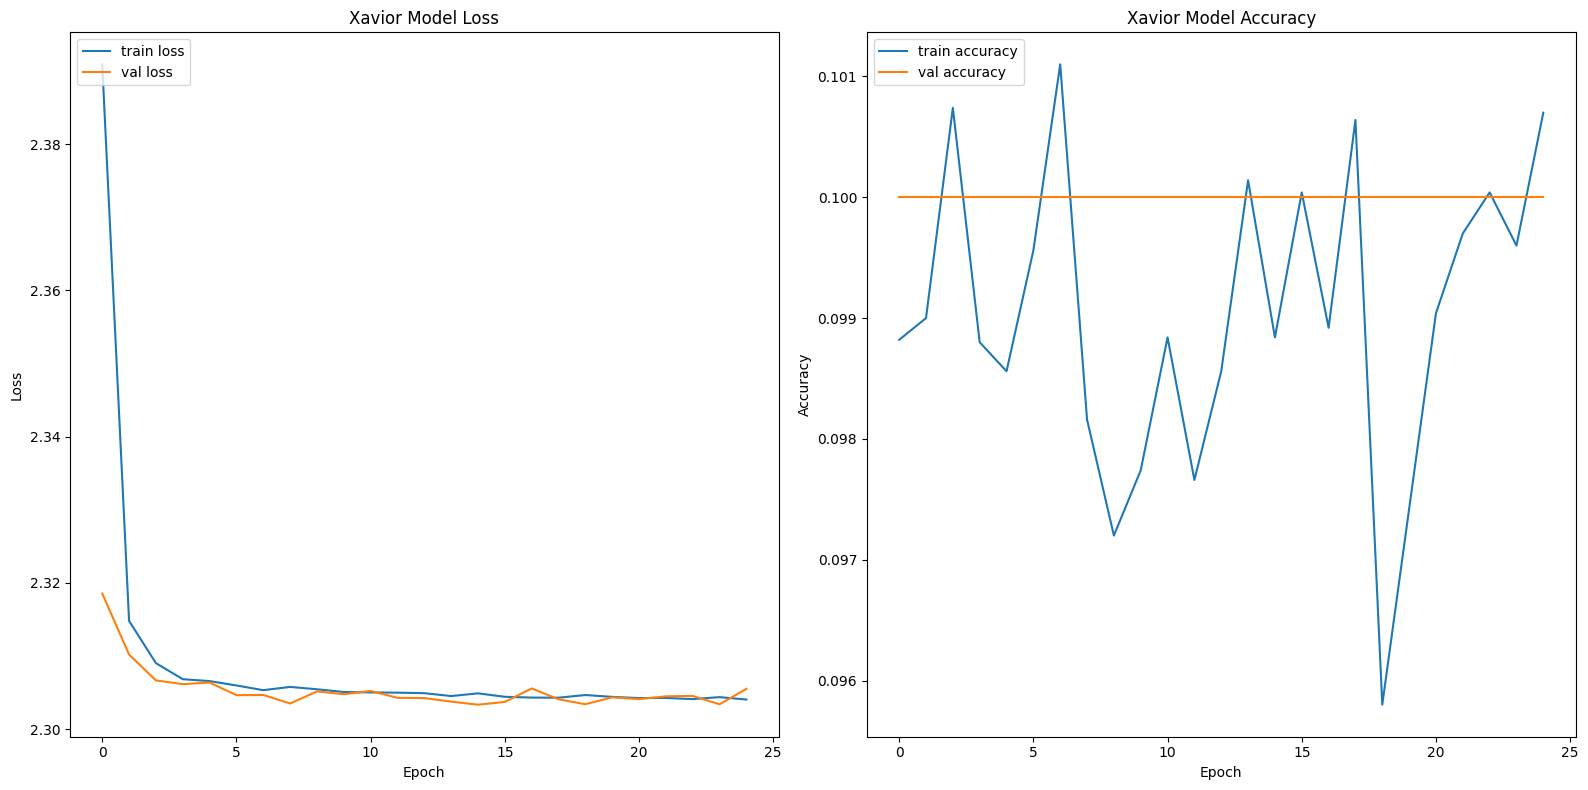

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(x_history.history['loss'], label='train loss')
ax[0].plot(x_history.history['val_loss'], label='val loss')
ax[0].set_title('Xavior Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

ax[1].plot(x_history.history['accuracy'], label='train accuracy')
ax[1].plot(x_history.history['val_accuracy'], label='val accuracy')
ax[1].set_title('Xavior Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

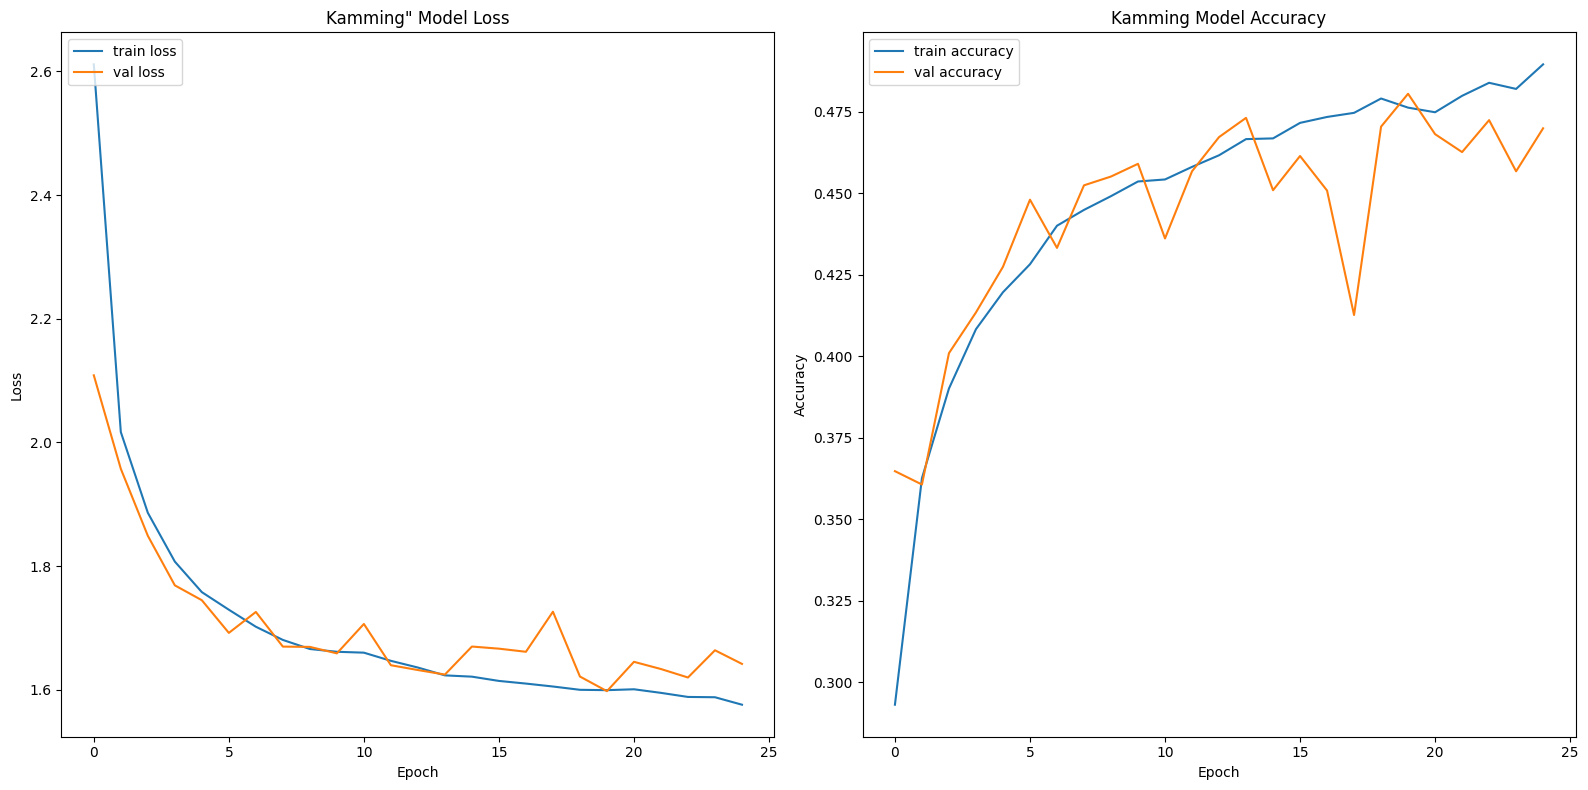

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(k_history.history['loss'], label='train loss')
ax[0].plot(k_history.history['val_loss'], label='val loss')
ax[0].set_title('Kamming" Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

ax[1].plot(k_history.history['accuracy'], label='train accuracy')
ax[1].plot(k_history.history['val_accuracy'], label='val accuracy')
ax[1].set_title('Kamming Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()